In [54]:
# 各ライブラリのインストール
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import statistics

In [55]:
# 個体クラスの定義
class Indivisual():
    def __init__(self, x):
        self.sex = np.random.choice(["m", "f"], p=[x, (1-x)])
        self.sexratio = x
        self.age = 0
        self.cool_time = 0
        
    def death(self): # 死亡処理(0が死，1が生を意味する)
        if self.age == 30: # 30歳で確実に死ぬ
            return 0
        else:
            return np.random.choice([0, 1], p=[(1/20), (19/20)]) # 1/30の確率で死ぬ
    
    def aging(self): # 歳を取る
        self.age = self.age + 1

        if self.cool_time != 0:
            self.cool_time = self.cool_time - 1

In [56]:
# シミュレーションクラスの定義
class Simulation():
    def __init__(self, x, firstsize, limit):
        self.population = self.__initialize(x, firstsize)
        self.limit = limit

    # 初期集団をつくる
    def __initialize(self, x, firstsize):
        population = []

        for i in range(firstsize):
            population.append(Indivisual(x))
        
        return population


    # 次世代の性比強度の決定
    def __make_nextGen(self, female, male):
        ave = 0
        nextgen = -1
    
        # 両親の性比強度の平均
        ave = (female.sexratio + male.sexratio) / 2
        # 平均ave、分散0.1の正規分布から次世代の値を決定
        while nextgen < 0 or nextgen >= 1:
            nextgen = np.random.normal(ave, 0.1)
    
        return nextgen


    # 集団内の交尾
    def __copulation(self):
        male_population = []
        female_population = []
        newgen = []

        # オスメスの振り分け
        # 生殖可能な個体を選ぶ
        for focal in self.population:
            if (focal.sex == 'm') and (focal.age > 5):
                male_population.append(focal)
            elif (focal.sex == 'f') and (focal.age > 5) and (focal.cool_time == 0):
                female_population.append(focal)

        # 後備の回数を決定
        if len(female_population) >= len(male_population):
            cop_i = len(male_population)
        else:
            cop_i = len(female_population)
        
        # 交尾させる雌雄の抽出と交配
        # クールタイムの発生
        for i in range(cop_i):
            cop_female = female_population.pop(random.randrange(len(female_population)))
            cop_male = male_population.pop(random.randrange(len(male_population)))
            newgen.append(self.__make_nextGen(cop_female, cop_male))
            cop_female.cool_time = 5
        
        return newgen


    # 人口抑制プログラム
    def __populationControl(self, population, limit):
        while len(population) > int(limit):
            index = random.randrange(len(population))
            del population[index]


    # 1世代のシミュレーションを実行
    def run_one_episode(self):
        for popu in self.population[:]: 
            popu.aging() # 歳を取らせてる
            if popu.death() == 0: # もし死んでいたら削除
                index = self.population.index(popu)
                del self.population[index]
        
        newegg = self.__copulation()
        if newegg is not None:
            for i in newegg:
                self.population.append(Indivisual(i))

        self.__populationControl(self.population, self.limit)


In [57]:
# main処理
def main(x, firstsize, limit, iteration):
    t = list(range(1, (iteration + 1)))
    whole_size = []
    sexratio = []
    simulation = Simulation(x, firstsize, limit)

    for i in tqdm(range(iteration)):
        simulation.run_one_episode()

        male_size = 0
        for focal in simulation.population:
            if focal.sex == 'm':
                male_size += 1
        whole_size.append(len(simulation.population))
        sexratio.append(male_size / len(simulation.population))

    plt.figure()
    plt.plot(t, sexratio)
    plt.title('sex ratio')
    plt.xlabel('Generations')
    plt.grid(True)

    plt.figure()
    plt.plot(t, whole_size)
    plt.title('whole size')
    plt.xlabel('Generations')
    plt.grid(True)

100%|██████████| 1000/1000 [00:20<00:00, 49.60it/s]


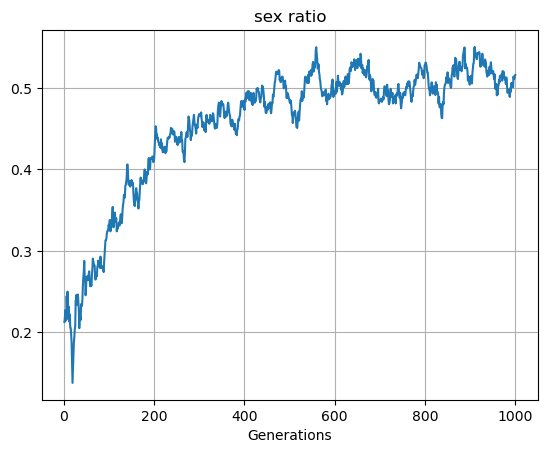

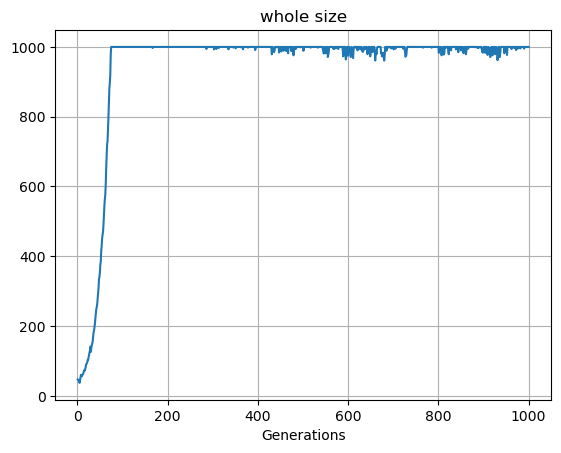

In [58]:
# 初期性比0.2、初期集団サイズ50、最大集団サイズ200、ループ回数100
main(0.2, 50, 1000, 1000)